# Dowloading and Extracting the Data

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset_name = "omkargurav/face-mask-dataset"
api.dataset_download_files(dataset_name, path='.', unzip=True)

print(f"Dataset {dataset_name} downloaded and extracted.")


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
Dataset omkargurav/face-mask-dataset downloaded and extracted.


# Importing the Dependencies

In [2]:
import os # To access files in folders
import numpy as np # used to create an array of images
import matplotlib.pyplot as plt # Used to visualize data
import matplotlib.image as mpimg # Used to visualize images
import cv2 # Used for image processing
from PIL import Image # PIL is pillow library used to read images and perform processing on images
from sklearn.model_selection import train_test_split # To split data

# Data Analysis

In [4]:
# Creates a list of all file names in with_mask folder
with_mask_files = os.listdir('./data/with_mask')

In [5]:
print(with_mask_files[:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [6]:
without_mask_files = os.listdir('./data/without_mask')

In [7]:
print(without_mask_files[:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [8]:
# To check is data is balanced
print('Number of with mask images: ', len(with_mask_files))
print('Number of without mask images: ', len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


# Creating Labels for two classes of images

with mask => 1,
without mask => 0

In [9]:
# Label Encoding

with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

In [10]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
# Concatenation

labels = with_mask_labels + without_mask_labels

In [12]:
print(len(labels))

7553


In [13]:
print(labels[:5])

[1, 1, 1, 1, 1]


In [14]:
print(labels[-5:])

[0, 0, 0, 0, 0]


# Displaying the Images

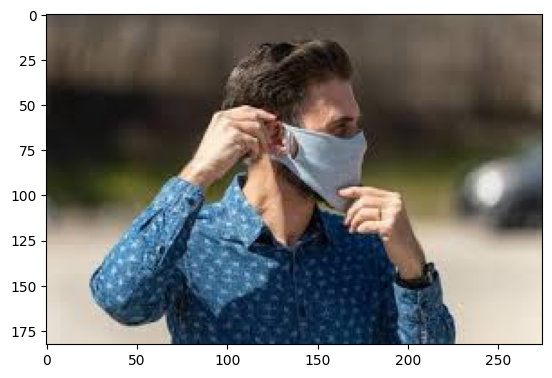

In [15]:
# displaying with mask image

img = mpimg.imread('./data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

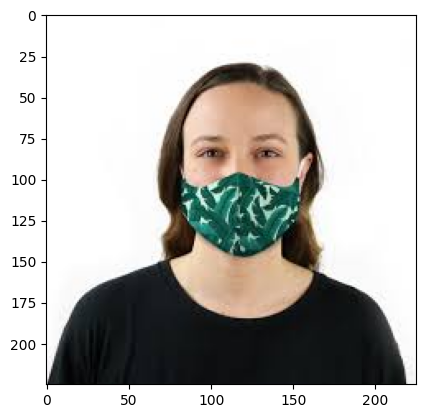

In [16]:
img = mpimg.imread('./data/with_mask/with_mask_2560.jpg')
imgplot = plt.imshow(img)
plt.show()

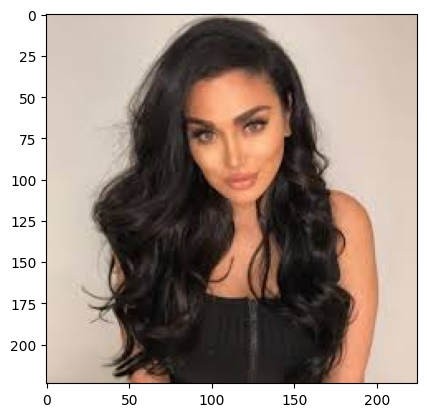

In [17]:
# displaying without mask image

img = mpimg.imread('./data/without_mask/without_mask_2920.jpg')
imgplot = plt.imshow(img)
plt.show()

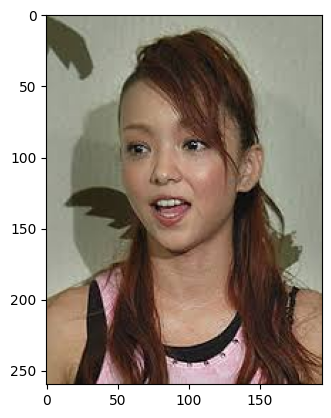

In [19]:
# displaying without mask image

img = mpimg.imread('./data/without_mask/without_mask_2970.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing

1. Resize the Images
2. Convert the images to numpy arrays

In [23]:
# Convert images to numpy arrays

with_mask_path = './data/with_mask/'

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB') # Either all images should be colored or all images should be black and white
    image = np.array(image)
    data.append(image)

In [24]:
without_mask_path = './data/without_mask/'

for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB') # Either all images should be colored or all images should be black and white
    image = np.array(image)
    data.append(image)

In [25]:
type(data)

list

In [27]:
# 3 indicate R G B

print(data[0])

[[[50 58 31]
  [46 55 33]
  [56 58 42]
  ...
  [27 32 25]
  [29 33 19]
  [33 40 17]]

 [[47 54 30]
  [49 58 36]
  [59 63 40]
  ...
  [18 21 11]
  [37 42 31]
  [31 41 23]]

 [[51 58 37]
  [50 59 37]
  [59 64 37]
  ...
  [45 44 30]
  [29 34 27]
  [20 30 18]]

 ...

 [[63 73 37]
  [66 75 41]
  [74 84 50]
  ...
  [ 5  3  0]
  [20 19 14]
  [17 16 12]]

 [[58 72 34]
  [60 70 39]
  [68 75 49]
  ...
  [16 15 12]
  [15 13 10]
  [13  9  7]]

 [[53 69 30]
  [53 64 37]
  [57 64 42]
  ...
  [18 18 16]
  [16 13 12]
  [19 12 13]]]


In [28]:
data[0].shape

(128, 128, 3)

# Converting image list and label list to numpy array

In [29]:
X = np.array(data)
y = np.array(labels)

In [30]:
type(X)

numpy.ndarray

In [31]:
type(y)

numpy.ndarray

In [32]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


# Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


# Scaling the data

In [35]:
# Total number of pixels: 255
# Scaling is done to get all values between 0 and 1

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [36]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

# Building a Convolutional Neural Networks (CNN)

In [37]:
# Tensorflow and pytorch are widely used networks to build neural networks
# Keras is a wrapper of these libraries. Keras need either tensorflow or pytorch in it's backend

import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

In [40]:
model = keras.Sequential()

# Convolutional layer, input shape is given only to first layer
model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (128, 128, 3)))

# Max Pooling layer
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

# Compile the neural network

In [41]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

# Training the neural network

In [43]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 124s 710ms/step - acc: 0.7304 - loss: 0.6244 - val_acc: 0.8479 - val_loss: 0.3310
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 120s 708ms/step - acc: 0.8834 - loss: 0.3159 - val_acc: 0.8843 - val_loss: 0.2775
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 130s 630ms/step - acc: 0.8886 - loss: 0.2727 - val_acc: 0.9041 - val_loss: 0.2415
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 122s 718ms/step - acc: 0.9084 - loss: 0.2450 - val_acc: 0.9256 - val_loss: 0.2089
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 125s 732ms/step - acc: 0.9271 - loss: 0.1846 - val_acc: 0.9306 - val_loss: 0.1978


# Model Evaluation

In [45]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - acc: 0.9337 - loss: 0.1737
Test Accuracy =  0.9338186383247375


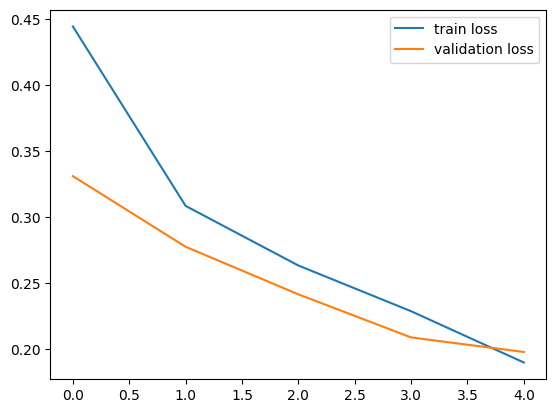

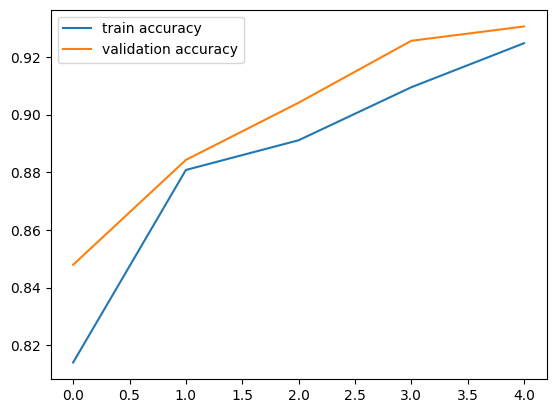

In [46]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

# Predictive System

In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2.imshow("Input Image", input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')

Path of the image to be predicted: ./last_no_mask.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.40451756 0.5564048 ]]
1
The person in the image is wearing a mask
